# Welcome!

This is intended as a very high-level introduction to `pyevo`. <b>`pyevo` is a python library for simulating and analyzing emergent properties and behaviors resulting from natural selection and evolutionary processes</b>. This notebook will go over how to run a basic simulation

In [1]:
import sys
sys.path.append('..')
from environment import *
from blobs import BaseBlob, MutatedBaseBlob, SturdyBlob

%load_ext autoreload
%autoreload 2

## Blobs
Blobs are the basic "living" unit in `pyevo`. Each blob can be thought of as a single organism.

For this portion, we will stick to just two types of blobs: `BaseBlob` and `MutatedBlob`

Here's how we instantiate a blob. We'll name this blob `john` for now

In [2]:
john = BaseBlob()
print(john)

BaseBlob(s=0.5,r=0.5,m=0.5)


Notice that `john` was comes with 3 parameters. These correspond to his probabilities of survival, reproduction, and mutation respectively. A probability of `1.0` for all of these means that at each epoch, ```john``` is guaranteed to survive, reproduce, and mutate <i>if</i> the right conditions are met. All blobs have at least these parameters, with more complicated blobs having more

We can change these parameters via the `set_probs` method. For simplicity's sake, let's make `john` a perfect blob

In [3]:
john.set_probs(1.0, 1.0, 1.0)

Now let's introduce a second blob, named `gretchen`

In [4]:
gretchen = BaseBlob()
gretchen.set_probs(0.5, 0.9, 0.0)

print(john.name == gretchen.name)

True


While `gretchen` is the same type of blob as John (as seen by accessing the `name` attribute), she has different attribute values. In particular, `gretchen` has a much lower probability of survival (`0.5`), a slightly lower reproduction probability (`0.9`), and no chance of mutation.

We'll see how survival and reproduction work later on, but for now let's see what mutations do. `john` has a mutation probability of `1.0` meaning that when he reproduces, his offspring are guaranteed to exhibit a mutation. In contrast, `gretchen` has a probability of `0.0`, which means her offspring have no chance of exhibiting a mutation

To reproduce, each blob has a `reproduce` method that is called

In [5]:
john_child = john.reproduce()
gretchen_child = gretchen.reproduce()

`john_child` & `gretchen_child` are the offspring produced by `john` and `gretchen` respectively. Let's see what type of blobs they are

In [6]:
print(f"type(john_child): {john_child.name}")
print(f"type(gretchen_child): {gretchen_child.name}")

type(john_child): MutatedBaseBlob
type(gretchen_child): BaseBlob


As we can see by the types, `john`'s child is a different type than he is! He's undergone a mutation. Each blob type in `pyevo` can mutate into one or multiple other types of blobs. This is defined in the class __init__ under `mutation_class`

Mutated classes will often have different properties than their parents. These are also defined under the __init__ in `mutated_offspring_traits`. As we can see below, `john_child` is almost identical to his father `john` <i>except</i> for the decreased probability of mutation

In [7]:
print(f"john_child attrs: {str(john_child)}")
print(f"john attrs: {str(john)}")

john_child attrs: MutatedBaseBlob(s=0.5,r=0.5,m=0.5)
john attrs: BaseBlob(s=1.0,r=1.0,m=1.0)


The types of blobs and their various attributes are limited only by your imagination. See ```blobs.py``` for more examples, or write your own!

## Environment

The framework in which blobs can interact is an environment. Environments can be thought of as the "physical" component of `pyevo`, where blobs can move around, fight, mate, and compete. 

For starters, let's create a bunch of blobs and put them in a simple environment together. In this example, we'll only make two kinds of blobs that vary on their survival probability

In [15]:
base_blob_attrs = (0.7, 0.3, 0.0)
sturdy_blob_attrs = (0.9, 0.3, 0.0) #These are slightly tougher

base_blobs = [BaseBlob() for x in range(5)]
for base in base_blobs:
    base.set_probs(*base_blob_attrs)
    
sturdy_blobs = [SturdyBlob() for y in range(5)]
for stud in sturdy_blobs:
    stud.set_probs(*sturdy_blob_attrs)
    
blob_population = base_blobs + sturdy_blobs
blob_population

Right now these blobs are all identical within a type. To learn how to keep track of individual blobs, we'll add a <b>very</b> sturdy blob named `phillip` 

In [16]:
phillip = SturdyBlob() 
phillip.set_probs(1.0, 0.0, 0.0) #phillip is a survivor and nothing else
phillip.color = 'black' #this color attribute will allow us to visually keep track of phillip
blob_population.append(phillip)

Here we have a list of 11 blobs, 5 of each type + `phillip`. Now let's set them together into a simple environment

In [17]:
e = BaseEnvironment()
e.spawn_population(blob_population) #add population to environment

Cool! Now that all our blobs are contained within this environment, let's take the time to understand how `pyevo` simulations work.

`pyevo` works on an epoch-based evaluation system where at each epoch, the entire population of blobs is simultaneously evaluated against some condition(s). This means that at the end of each epoch, some portion of the population will get killed off, some will reproduce, etc. This repeats for a defined number of epochs.

Remember those attributes we set earlier? In this case, the only attributes our blobs have are those. Thus, the only condition we are evaluating is how that change in survival probability will affect the population. Let's allow the blobs to interact for 10 epochs and see what happens

In [18]:
for i in range(10):
    e.interact()

Great, now what? Our blobs have interacted with 30 epochs. Can you predict what happened to their populations? One possibility is that, in the absence of any predation or resource competition, both blob just reproduced whenever possible. With the `SturdyBlob`s more likely to survive any given epoch, it's likely that more were able to reproduce and thus the population grew larger than that of the `BaseBlob`s as the epochs progressed.

The good news is that we don't have to speculate - we can actually see how the generations progressed over time!

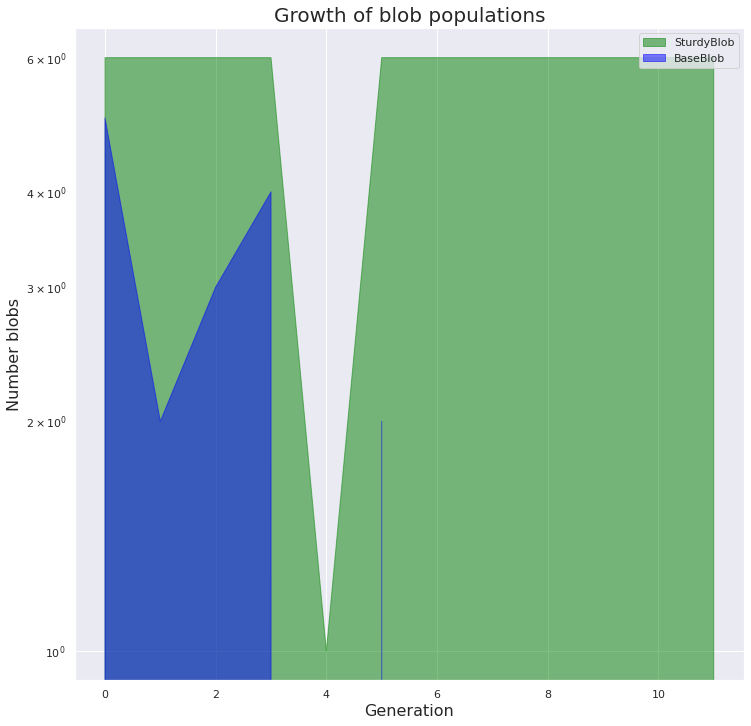

In [19]:
e.plot_growth()

Looks like our prediction was correct! The additional survival benefit conferred to the `SturdyBlob`s enabled them to out-survive and grow past what the weaker `BaseBlob`s were able to. We can even plot the specifics of the simulation epoch by epoch to see what our blobs are up to

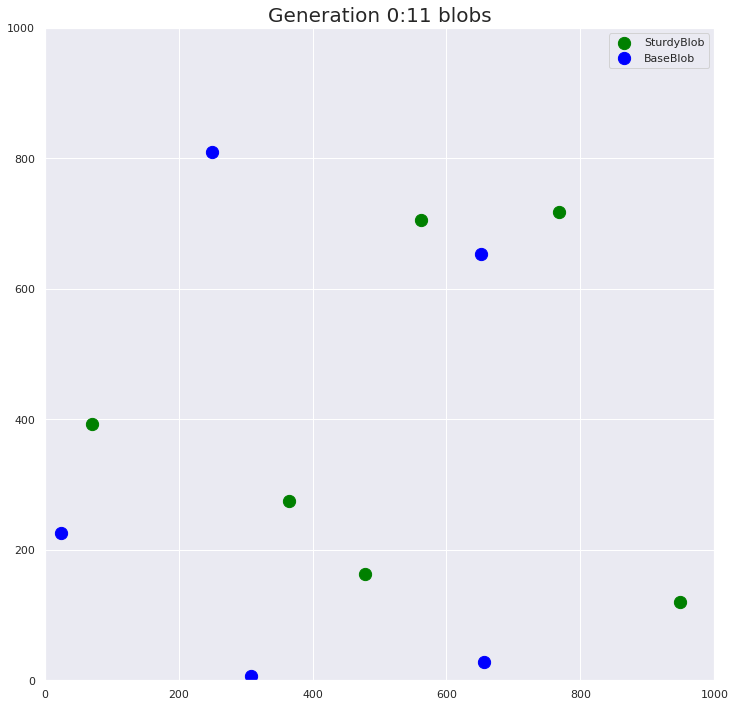

In [ ]:
e.show_all_generations()

Since we defined accessed `phillip`'s color attribute earlier, we can keep track of him individually through this display.

This is just the tip of the iceberg for what `pyevo` is capable of. In theory, any simulation of natural selection conditions should be definable and simulatable under this framework. The only limitations are your imagination and computational power!